IBM Assessment

Team Members : 

Alwin Mariya Joswa LS

Anees A

Muthusriram 

Sreeraj S

Sripraveen S 

Import required library

Read dataset and do pre-processing

In [40]:

import numpy as np 
import pandas as pd
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("/content/spam.csv",encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [3]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [5]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#data.isnull().sum()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


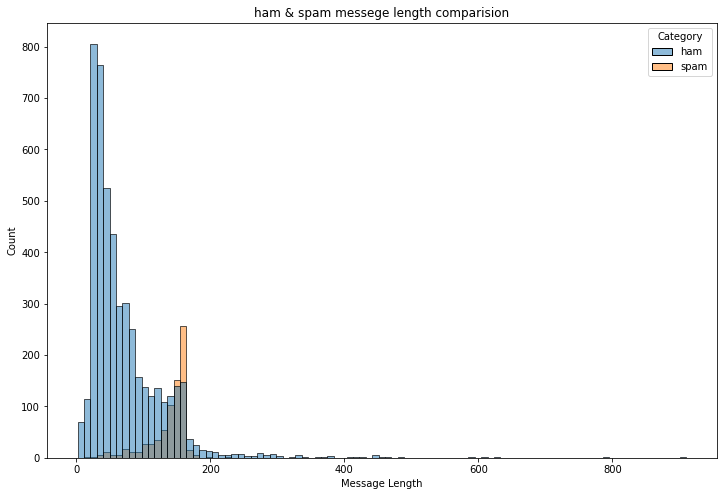

In [9]:
data["Message Length"]=data["Message"].apply(len)

fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [10]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [11]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


Create *Model*

Add Layers (LSTM, Dense-(Hidden Layers), Output)

In [12]:
data["Category"].value_counts()


ham     4825
spam     747
Name: Category, dtype: int64

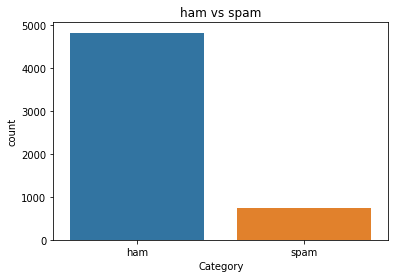

In [13]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [14]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


In [15]:
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])

minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index

random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=data.loc[undersampled_indices]
df=df.sample(frac=1)
df=df.reset_index()
df=df.reset_index()

In [16]:
df.shape

(1494, 5)

In [17]:
df["Category"].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

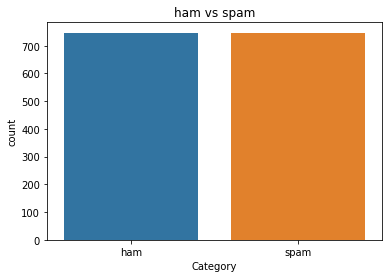

In [18]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [19]:
df.head()

,level_0,index,Category,Message,Message Length
0,0,2629,ham,Hey there! Glad u r better now. I hear u treat...,139
1,1,4181,spam,Urgent! Please call 0906346330. Your ABTA comp...,144
2,2,3638,ham,Wat's da model num of ur phone?,31
3,3,3201,ham,Okay lor... Wah... like that def they wont let...,110
4,4,2582,spam,3 FREE TAROT TEXTS! Find out about your love l...,131


In [21]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)
df.head()

,level_0,index,Category,Message,Message Length,Label
0,0,2629,ham,Hey there! Glad u r better now. I hear u treat...,139,0
1,1,4181,spam,Urgent! Please call 0906346330. Your ABTA comp...,144,1
2,2,3638,ham,Wat's da model num of ur phone?,31,0
3,3,3201,ham,Okay lor... Wah... like that def they wont let...,110,0
4,4,2582,spam,3 FREE TAROT TEXTS! Find out about your love l...,131,1


In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

corpus=[]

In [79]:
for message in df["Message"]:
  message=re.sub("[^a-zA-Z]"," ",message)
  message=message.lower()
  message=message.split()
  message=[stemmer.stem(words)
            for words in message
              #if words not in set(stopwords.words("english")):
            ]
  message=" ".join(message)
  corpus.append(message)
  message=" ".join(message)
  corpus.append(message)

In [34]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

df["Message Length"].describe()

count    1494.000000
mean      105.272423
std        58.503829
min         2.000000
25%        50.000000
50%       118.500000
75%       153.000000
max       790.000000
Name: Message Length, dtype: float64

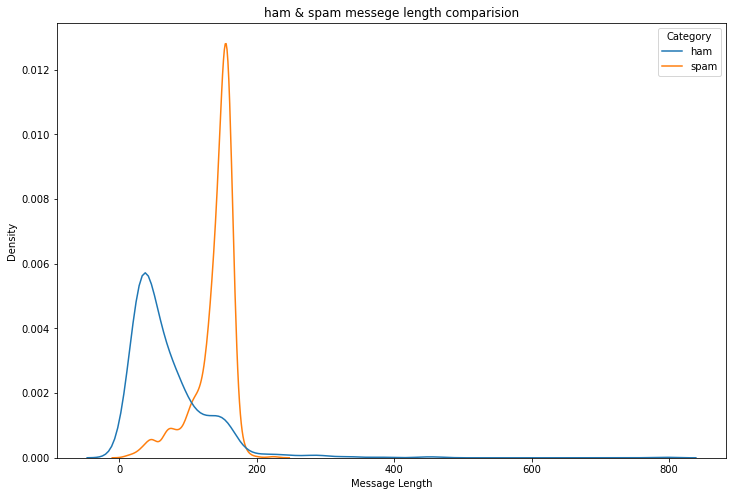

In [35]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [67]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)
extract_features=pd.DataFrame(
    data=embedded_doc
)
def classify_mesage(m):
  if m[0]=="y":
    print("Spam :(")
  else:
    print("Not Spam :)")

target=df["Label"]
df_final=pd.concat([extract_features,target],axis=1)


In [37]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,1016,1713,6317,6112,9988,9522,8962,6934,6562,0.0
1,0,0,0,0,0,0,0,0,0,0,...,6636,6762,4204,6706,7031,5227,3822,3654,3942,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1931,3725,6785,3,5276,5409,6803,7805,0.0
3,0,0,0,0,0,0,0,0,0,0,...,8346,8375,5338,2018,8962,4351,1078,6545,420,0.0
4,0,0,0,0,0,0,0,0,0,0,...,4017,562,31,297,7733,2317,4017,861,2579,1.0


In [39]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]
from sklearn.model_selection import train_test_split
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [41]:
model=Sequential()
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

In [42]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

● Compile the Model

● Fit the Model

In [44]:
model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=5
)

Epoch 1/5
135/135 [==============================] - 53s 396ms/step - loss: nan - accuracy: 0.1228 - val_loss: nan - val_accuracy: 0.1312
Epoch 2/5
135/135 [==============================] - 50s 373ms/step - loss: nan - accuracy: 0.1228 - val_loss: nan - val_accuracy: 0.1312
Epoch 3/5
135/135 [==============================] - 51s 380ms/step - loss: nan - accuracy: 0.1228 - val_loss: nan - val_accuracy: 0.1312
Epoch 4/5
135/135 [==============================] - 51s 380ms/step - loss: nan - accuracy: 0.1228 - val_loss: nan - val_accuracy: 0.1312
Epoch 5/5
135/135 [==============================] - 50s 373ms/step - loss: nan - accuracy: 0.1228 - val_loss: nan - val_accuracy: 0.1312


In [82]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import accuracy_score,confusion_matrix

score=accuracy_score(y_test,y_pred)

print("Test Score:{:.2f}%".format(score*100))

29/29 [==============================] - 3s 109ms/step
Test Score:100.00%


In [83]:
def classify_message(model,message):
    
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        for sentence in sentences:
            words=re.sub("[^a-zA-Z]"," ",sentence)
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)
    

    oneHot=[one_hot(word,n=vocab_size)]
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    predict=model.predict(text)
    if predict>0.5:
        print("It is a spam")
    else:
        print("Not Spam :)")


array([[897]])

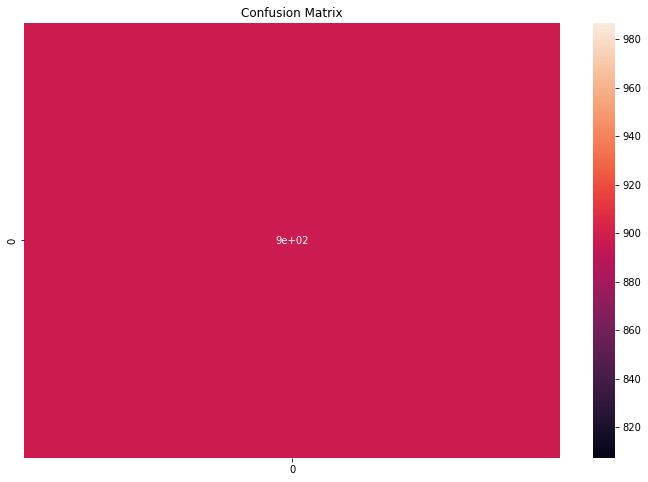

In [84]:

cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

In [93]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

TEST Model

In [95]:
m1="complete your IBM assessment"
classify_message(model,m1)

1/1 [==============================] - 0s 33ms/step
Not Spam :)
